# Building Custom Helmet Detector using YOLOv3 and Darknet

**Cloning and Building Darknet**

We will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15549, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 15549 (delta 10), reused 27 (delta 6), pack-reused 15514
Receiving objects: 100% (15549/15549), 14.24 MiB | 9.12 MiB/s, done.
Resolving deltas: 100% (10422/10422), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile


/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this 

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

### Connecting Google Drive



In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 11ResumeFinalist.gdoc
 11ResumeFinalist.pdf
 All
 an-introduction-to-formal-languages-and-automata-5th-edition-2011.gdoc
'Colab Notebooks'
 detect.py
 detect_video.py
 d.py
'FINAL TEST'
 functions.py
 IITGN.zip
 images
 images1
 images2
 lp.zip
'lp.zip (Unzipped Files)'
 Motocross_preview.mp4
 MyAadhaar.pdf
'My Drive'
 OCR
'reistration issue.PNG'
 slokas
 TEST
 TEST2
'vaccine certificate.pdf'
 yolov3
 yolov6


##Training a Custom YOLOv3 Object Detector (Helmet and License plate detection.)


In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional )


## i. Moving Custom Dataset Into Cloud VM


In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

 backup			       generate_train1.py   obj.names
 backup1		       generate_train.py    obj.zip
'backup(ultra fail)'	       obj2.zip		    yolov3_custom2.cfg
'Copy of generate_train1.py'   obj.data		    yolov3_custom.cfg
 custom.classes		       obj.data.gdoc


In [ ]:
%cd /content

/content


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ./

In [ ]:
# unzip the zip file and its contents should now be in /content/data/obj
!unzip ./obj.zip -d data/

In [ ]:
# moving to /content/darknet/data
!mv /content/data/obj /content/darknet/data

#### Removing some images that causes issues in training

In [ ]:
!mv /content/darknet/data/obj/228.jpg /content/sample_data

In [ ]:
!mv /content/darknet/data/obj/1371.jpg /content/sample_data

In [ ]:
!mv /content/darknet/data/obj/1371.txt /content/sample_data

## ii. Configuring the cfg file.

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [ ]:
%cd /content/darknet

/content/darknet


Now you need to edit the .cfg to fit your needs based on your object detector.

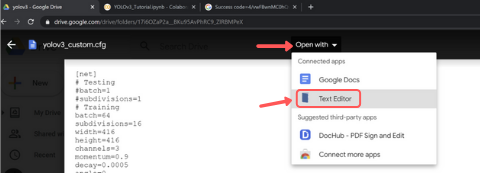

we are using **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** Here we set **max_batches = 10000**, **steps = 8000, 9000**, I changed the **classes = 5** in the three YOLO layers and **filters = 30** in the three convolutional layers before the YOLO layers.

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg /content/darknet/cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd ..

## iii. obj.names and obj.data
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.





In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names /content/darknet/data
!cp /mydrive/yolov3/obj.data  /content/darknet/data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd ..

## iv. Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.



In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now we simply run the python script to do all the work for us.

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
!python generate_whole.py
#or
# generate txt files for whole dataset
# !cp generate_whole.py /mydrive/yolov3/
# # generate train.txt and test.txt files for whole dataset
# !cp generate_train_test_txt.py /mydrive/yolov3/

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls /content/darknet/data

9k.tree     giraffe.jpg		      labels		person.jpg  whole.txt
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test.txt
dog.jpg     imagenet.labels.list      obj.names		train.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	voc.names


In [ ]:
 #generating train.txt and test.txt from train.txt
!python generate_train_test_txt.py


In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls /content/darknet/data

9k.tree     giraffe.jpg		      labels		person.jpg  whole.txt
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test.txt
dog.jpg     imagenet.labels.list      obj.names		train.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	voc.names


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
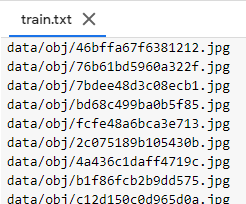

It will contain one line for each training image path.

##Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long.

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2023-08-14 10:07:46--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2023-08-14 10:07:46--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   104MB/s    in 1.5s    

2023-08-14 10:07:48 (104 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Train Your Custom Object Detector!

```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```


In [ ]:
%cd /content/darknet


/content/darknet


A cheat to use the google colab for longer time. I am not sure whether it works now also.


```

function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)

```

In [ ]:
# train your custom detector
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.718438), count: 1, class_loss = 0.102356, iou_loss = 0.049084, total_loss = 0.151440 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.299098), count: 3, class_loss = 0.908401, iou_loss = 2.281244, total_loss = 3.189645 
 total_bbox = 116872, rewritten_bbox = 0.166849 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.474143), count: 4, class_loss = 1.237035, iou_loss = 0.806616, total_loss = 2.043650 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000342, iou_loss = 0.000000, total_loss = 0.000342 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000165, iou_loss = 0.000000, total_loss = 0.000165 
 total_bbox = 116876, rewritten_bbox = 0.166843 % 
v3 (m


```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

## Run Your Custom Object Detector!!!


In [ ]:
# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_custom_last.weights /content/gdrive/MyDrive/TEST/test1.jpg -thresh 0.3
imShow('/content/darknet/predictions.jpg')

In [ ]:
! ./darknet detector map data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_custom_last.weights


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  